# Load Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("sampled_data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


In [3]:
df.shape

(28480, 31)

# EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

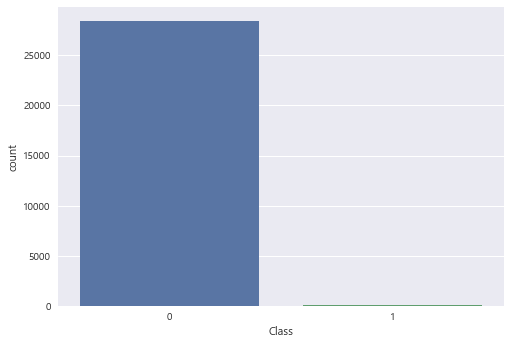

In [6]:
# target 변수의 class 분포 확인

sns.countplot(df["Class"])
plt.show()
# class가 0이 매우 많고 1이 상대적으로 매우 적은 불균형한 자료임을 알 수 있다

# Scaling
- 변수간에 크기 차이를 scaling을 통해 데이터의 값이 너무 크거나 혹은 작은 경우를 없앤다
- 방법은 아래와 같이 3가지 방법을 사용하고자 한다
* 1) Standard Scaler
* 2) Robust Scaler
* 3) Minmax Scaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# data를 train와 test로 0.75 : 0.25 비율로 나눕니다.

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state = 0)

### - Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
# 각 feature의 평균을 0, 분산을 1로 변경합니다.
# 모든 특성들이 같은 스케일을 갖게 됩니다.

In [10]:
scaler = StandardScaler() # Scaling
X_train_ss = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_ss = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
X_train_ss.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.141088,0.586925,-0.968592,0.432382,-0.966919,-1.248882,0.036402,-1.013445,0.074097,-1.766976,...,-0.030794,0.156213,0.580631,-0.212673,0.038067,0.379533,-0.215228,0.107590,0.158184,0.297652
1,1.456249,1.081048,0.062340,-0.913516,0.212346,0.116267,-0.936086,0.289661,-0.418775,0.369585,...,-0.203307,0.353481,1.341809,-0.073091,-0.061946,0.652136,-0.212672,-0.019133,-0.181189,-0.368837
2,0.758339,0.954367,-0.602437,-0.494572,0.083974,0.051970,1.537140,-0.988185,0.562614,-0.341868,...,-0.804415,-0.517925,-0.872195,0.710060,-1.775102,-1.303215,-1.746761,0.284582,-0.087274,-0.101393
3,1.617920,0.388561,0.447284,-1.261463,-0.400395,0.731182,-0.023677,-0.214270,-2.488924,-0.541547,...,0.557020,-1.580058,1.169909,-0.151165,0.411527,1.174555,1.290376,-0.063073,0.590984,-0.369856
4,1.399316,1.043264,-0.110064,-0.703709,0.221977,-0.175385,-0.725780,-0.002309,-0.109966,0.432847,...,-0.397082,-0.345051,-0.934751,0.593755,0.066706,-0.738798,0.374425,-0.202469,-0.232835,-0.368880


### - Robust Scaler

In [11]:
from sklearn.preprocessing import RobustScaler
# 모든 특성들이 같은 크기를 갖는다는 점에서 StandardScaler와 비슷하지만, 평균과 분산 대신 median과 quartile을 사용합니다.
# RobustScaler는 이상치에 영향을 받지 않습니다.

In [12]:
scaler2 = RobustScaler() # Scaling
X_train_rs = pd.DataFrame(scaler2.fit_transform(X_train), columns = X_train.columns)
X_test_rs = pd.DataFrame(scaler2.fit_transform(X_test), columns = X_test.columns)
X_train_rs.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.514082,0.499997,-1.212987,0.243244,-0.858180,-1.270289,0.274699,-1.122895,0.127426,-1.533230,...,0.121302,0.337482,0.384480,-0.348021,-0.018072,0.277402,-0.083538,0.243596,0.219147,1.935626
1,0.936066,0.922609,0.021360,-0.816730,0.198544,0.162181,-0.835203,0.268939,-0.933469,0.363671,...,-0.250207,0.677035,0.899173,-0.085700,-0.095630,0.488669,-0.081363,-0.067460,-0.518274,-0.297898
2,0.546408,0.814262,-0.774586,-0.486787,0.083512,0.094714,1.987493,-1.095915,1.178946,-0.267978,...,-1.544701,-0.822894,-0.597891,1.386095,-1.424158,-1.026730,-1.386587,0.678044,-0.314208,0.598357
3,1.026330,0.330341,0.482257,-1.090759,-0.350525,0.807420,0.206130,-0.269304,-5.389409,-0.445259,...,1.387165,-2.651119,0.782938,-0.232427,0.271542,0.893544,1.197452,-0.175315,1.159578,-0.301312
4,0.904279,0.890293,-0.185061,-0.651495,0.207174,-0.143853,-0.595181,-0.042911,-0.268766,0.419836,...,-0.667504,-0.525331,-0.640191,1.167521,0.004138,-0.589306,0.418147,-0.517480,-0.630496,-0.298040


### - MinMax Scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
# 모든 feature가 0과 1사이에 위치하게 만듭니다.
# 데이터가 2차원 셋일 경우, 모든 데이터는 x축의 0과 1 사이에, y축의 0과 1사이에 위치하게 됩니다.

In [14]:
scaler3 = MinMaxScaler() # Scaling
X_train_ms = pd.DataFrame(scaler3.fit_transform(X_train), columns = X_train.columns)
X_test_ms = pd.DataFrame(scaler3.fit_transform(X_test), columns = X_test.columns)
X_train_ms.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.234087,0.963777,0.737365,0.886399,0.208025,0.392630,0.576782,0.493945,0.676424,0.392897,...,0.520401,0.414322,0.675164,0.452540,0.439654,0.540139,0.324439,0.588416,0.583501,0.020950
1,0.950558,0.990234,0.765003,0.817838,0.299981,0.429705,0.539570,0.522846,0.664480,0.522488,...,0.516821,0.417981,0.716398,0.455058,0.430029,0.559374,0.324708,0.585124,0.576998,0.000133
2,0.758041,0.983451,0.747181,0.839179,0.289971,0.427959,0.634206,0.494505,0.688263,0.479336,...,0.504348,0.401816,0.596462,0.469190,0.265167,0.421400,0.163545,0.593014,0.578797,0.008486
3,0.995155,0.953156,0.775322,0.800113,0.252201,0.446406,0.574483,0.511670,0.614312,0.467224,...,0.532597,0.382112,0.707086,0.453649,0.475593,0.596238,0.482610,0.583982,0.591794,0.000101
4,0.934853,0.988211,0.760381,0.828525,0.300732,0.421784,0.547617,0.516371,0.671963,0.526325,...,0.512800,0.405023,0.593073,0.467091,0.442410,0.461226,0.386385,0.580361,0.576008,0.000131


# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# sklearn의 LogisticRegression() 함수를 이용해서 fit을 시키고 
# 그 classifier와 predict한 class를 return하는 함수를 구현하였습니다.

def logistic_regression(X_train, X_test, y_train, y_test):
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)
    return clf, y_pred, y_prob

# Mean Accuracy

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Test Accuracy와 Cross Validation을 해서 나온 Mean Accuracy를 출력하는 함수를 구현하였습니다.

def print_accuracy(X_train, X_test, y_train, y_test):
    clf = logistic_regression(X_train, X_test, y_train, y_test)[0]
    y_pred = logistic_regression(X_train, X_test, y_train, y_test)[1]
    print("Test Accuracy: \n  ", clf.score(X_test, y_test))
    
    scores = cross_val_score(clf, X_train, y_train, cv=5) 
    print('Cross val score: \n   {}'.format(scores))
    print('Mean Accuracy: \n   {:.7f}'.format(scores.mean()))

In [19]:
# Standard Scaler Data
print_accuracy(X_train_ss, X_test_ss, y_train, y_test)

Test Accuracy: 
   0.9998595505617978
Cross val score: 
   [0.99859583 0.99836181 0.99859551 0.99836104 0.99906345]
Mean Accuracy: 
   0.9985955


In [20]:
# Robust Scaler Data
print_accuracy(X_train_rs, X_test_rs, y_train, y_test)

Test Accuracy: 
   0.9998595505617978
Cross val score: 
   [0.99859583 0.99836181 0.99859551 0.99859518 0.99906345]
Mean Accuracy: 
   0.9986424


In [21]:
# MinMax Scaler Data
print_accuracy(X_train_ms, X_test_ms, y_train, y_test)

Test Accuracy: 
   0.9992977528089888
Cross val score: 
   [0.99812778 0.99812778 0.99812734 0.99836104 0.99859518]
Mean Accuracy: 
   0.9982678


In [22]:
# Robust Scaler Data > Standard Scaler Data > MinMax Scaler Data 순으로 Mean Accuracy가 높게 나오고 있음을 알 수 있습니다.

# Confusion Matrix

In [23]:
from sklearn.metrics import *

In [24]:
# Evaluation Metrics를 한 번에 출력해주는 함수를 생성

def print_metrics(X_train, X_test, y_train, y_test):
    y_pred = logistic_regression(X_train, X_test, y_train, y_test)[1]
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print()
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("f1 Score: ", f1_score(y_test, y_pred))

In [25]:
# Standard Scaler Data
print_metrics(X_train_ss, X_test_ss, y_train, y_test)

Confusion Matrix: 
[[7111    0]
 [   1    8]]

Precision:  1.0
Recall:  0.8888888888888888
f1 Score:  0.9411764705882353


In [26]:
# Robust Scaler Data
print_metrics(X_train_rs, X_test_rs, y_train, y_test)

Confusion Matrix: 
[[7111    0]
 [   1    8]]

Precision:  1.0
Recall:  0.8888888888888888
f1 Score:  0.9411764705882353


In [27]:
# MinMax Scaler Data
print_metrics(X_train_ms, X_test_ms, y_train, y_test)

Confusion Matrix: 
[[7111    0]
 [   5    4]]

Precision:  1.0
Recall:  0.4444444444444444
f1 Score:  0.6153846153846153


In [28]:
# Confusion Matrix를 보았을 때에는
# Robust Scaler Data = Standard Scaler Data > MinMax Scaler Data 순으로 f1 Score가 높게 나오고 있음을 알 수 있습니다.

# ROC Curve

In [29]:
# 최적의 Cut off (threshold)를 찾기 위해 threshold와 data를 입력으로 받으면
# 해당 threshold를 기준으로 Confusion Matrix를 출력해 주는 함수 생성

def change_threshold(X_train, X_test, y_train, y_test, threshold):
    clf = logistic_regression(X_train, X_test, y_train, y_test)[0]
    y_pred = logistic_regression(X_train, X_test, y_train, y_test)[1]
    prob = clf.predict_proba(X_test)[:,1] # Class가 1일 확률
    y_pred[prob >= threshold] = 1 # 확률이 threshold보다 크거나 같은 경우 Class를 1로 부여
    y_pred[prob < threshold] = 0 # 확률이 threshold보다 작은 경우 Class를 0로 부여
    
    # Confusion Matrix와 Precision, Recall, F1 Score 출력
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print()
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("f1 Score: ", f1_score(y_test, y_pred))
    
    # ROC Curve 출력
    fpr, tpr, thresholds = roc_curve(y_test, clf.decision_function(X_test))
    print("\nROC Curve: ")
    plt.plot(fpr, tpr)
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.show()

In [30]:
# False Positive : 암세포가 맞다고 판단했는데 암세포가 아닌 경우
# False Negative : 암세포가 아니라고 판단했는데 암세포가 맞는 경우

# False Negative은 False Positive보다 훨씬 치명적인 error이므로 
# False Negative 확률이 적은 Recall이 높은 경우가 더 좋다고 판단하여 threshold를 조정하기로 하였습니다.

In [31]:
# threshold에 따른 precision과 recall 값을 알아보기 위해 plot을 그리는 함수 생성

def plot_precision_recall_by_threshold(X_train, X_test, y_train, y_test):
    y_prob = logistic_regression(X_train, X_test, y_train, y_test)[2]
    
    # precision & recall
    precision, recall, threshold = precision_recall_curve(y_test, y_prob[:,1])
    
    # plot
    plt.plot(threshold, precision[:-1], "b--", label="Precision")
    plt.plot(threshold, recall[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.figure(figsize=(8, 4))
    plt.show()

**Not Changing Cut off**

Confusion Matrix: 
[[7111    0]
 [   1    8]]

Precision:  1.0
Recall:  0.8888888888888888
f1 Score:  0.9411764705882353

ROC Curve: 


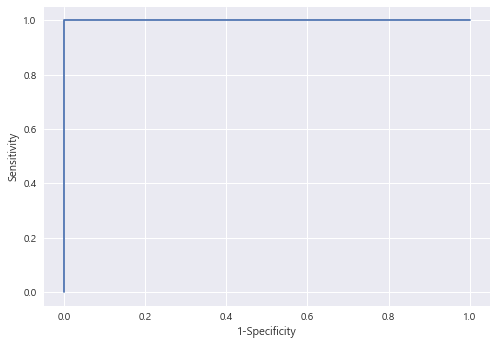

**Cut off Plot**



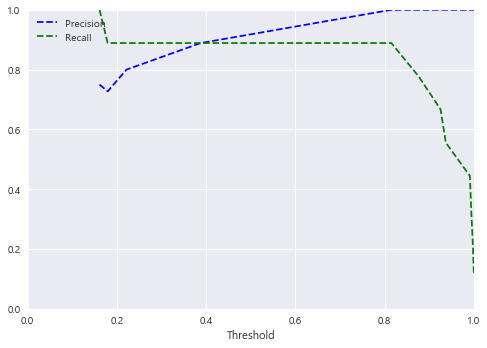

<Figure size 576x288 with 0 Axes>

**Changed Cut off**

Confusion Matrix: 
[[7108    3]
 [   0    9]]

Precision:  0.75
Recall:  1.0
f1 Score:  0.8571428571428571

ROC Curve: 


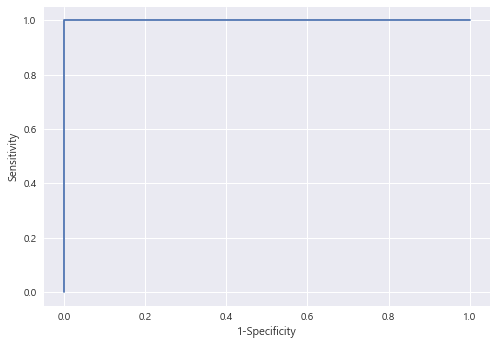

In [32]:
# Standard Scaler Data
print("**Not Changing Cut off**\n")
change_threshold(X_train_ss, X_test_ss, y_train, y_test, 0.5)
print("**Cut off Plot**\n")
plot_precision_recall_by_threshold(X_train_ss, X_test_ss, y_train, y_test)
print("**Changed Cut off**\n")
change_threshold(X_train_ss, X_test_ss, y_train, y_test, 0.1)
# cut off를 0.1로 조정하였을 때 Recall이 1이 나오며 Precision이 높게 나와 성능이 향상되었음을 알 수 있습니다.

**Not Changing Cut off**

Confusion Matrix: 
[[7111    0]
 [   1    8]]

Precision:  1.0
Recall:  0.8888888888888888
f1 Score:  0.9411764705882353

ROC Curve: 


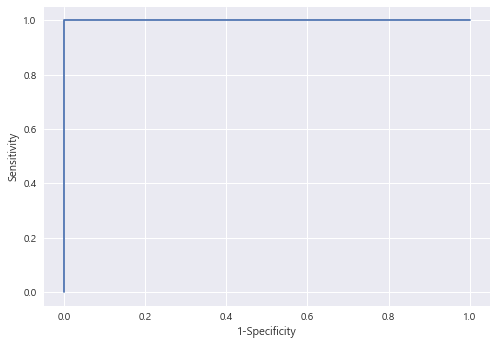

**Cut off Plot**



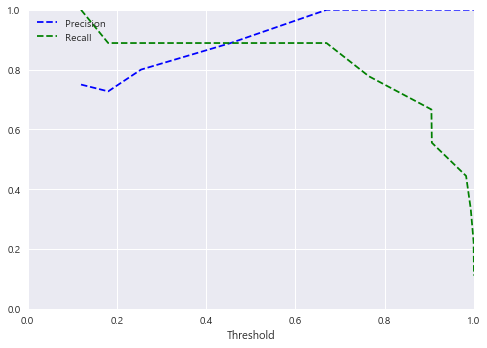

<Figure size 576x288 with 0 Axes>

**Changed Cut off**

Confusion Matrix: 
[[7108    3]
 [   0    9]]

Precision:  0.75
Recall:  1.0
f1 Score:  0.8571428571428571

ROC Curve: 


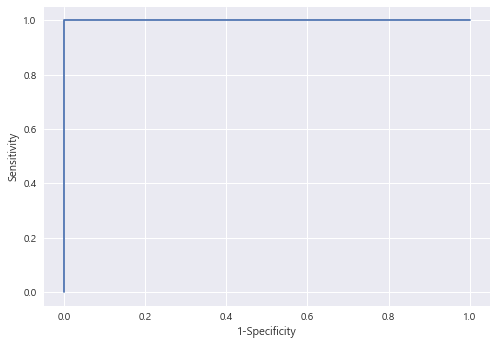

In [35]:
# Robust Scaler Data
print("**Not Changing Cut off**\n")
change_threshold(X_train_rs, X_test_rs, y_train, y_test, 0.5)
print("**Cut off Plot**\n")
plot_precision_recall_by_threshold(X_train_rs, X_test_rs, y_train, y_test)
print("**Changed Cut off**\n")
change_threshold(X_train_rs, X_test_rs, y_train, y_test, 0.11)
# cut off를 0.11로 조정하였을 때 Recall이 1이 나오고 Precision이 높게 나와 성능이 향상되었음을 알 수 있습니다.

**Not Changing Cut off**

Confusion Matrix: 
[[7111    0]
 [   5    4]]

Precision:  1.0
Recall:  0.4444444444444444
f1 Score:  0.6153846153846153

ROC Curve: 


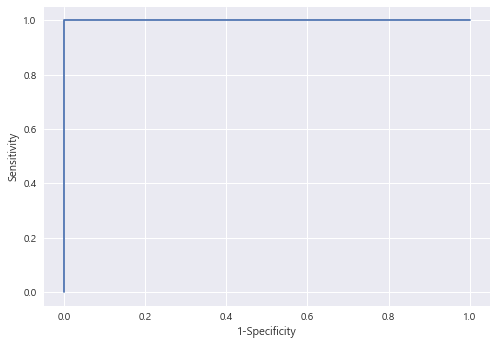

**Cut off Plot**



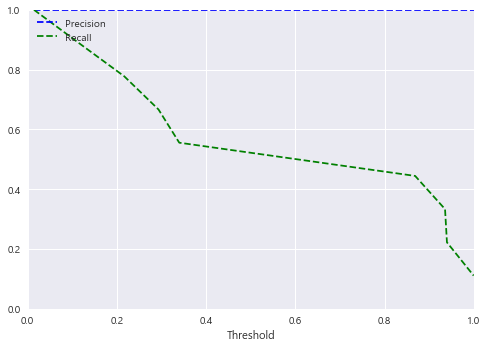

<Figure size 576x288 with 0 Axes>

**Changed Cut off**

Confusion Matrix: 
[[7111    0]
 [   0    9]]

Precision:  1.0
Recall:  1.0
f1 Score:  1.0

ROC Curve: 


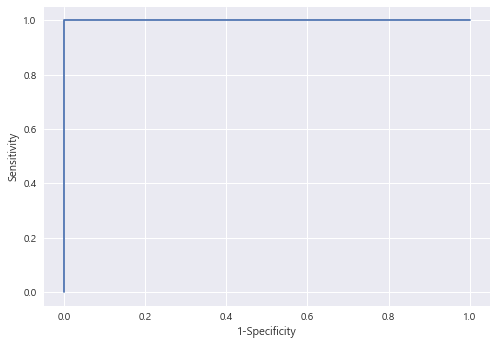

In [36]:
# MinMax Scaler Data
print("**Not Changing Cut off**\n")
change_threshold(X_train_ms, X_test_ms, y_train, y_test, 0.5)
print("**Cut off Plot**\n")
plot_precision_recall_by_threshold(X_train_ms, X_test_ms, y_train, y_test)
print("**Changed Cut off**\n")
change_threshold(X_train_ms, X_test_ms, y_train, y_test, 0.014)
# cut off를 0.1로 조정하였을 때 Precision과 Recall이 모두 1이 나와 큰 성능이 향상이 있음을 알 수 있습니다.

In [37]:
# Cut off를 조절한 후에 metrics들을 살펴 보았을 때에는
# MinMax Scaler Data > Robust Scaler Data = Standard Scaler Data 순으로 성능이 높게 나오고 있음을 알 수 있습니다.